# 6. Evaluation

In [1]:
# Importing libraries
import os
from pathlib import Path
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as pt
from scipy.stats import ttest_ind

In [2]:
# Setting up projectory directory

os.chdir(Path(os.path.realpath("")).resolve().parents[2])

In [3]:
# Importing modules that fetch data

from src.getter.load_application_and_opportunity import get_processed_data

# Gathering the data
similarity_w2v = get_processed_data("")
similarity_bert = get_processed_data("featurizeddata_bert")
similarity_dbert = get_processed_data("featurizeddata_dbert")

,opportunity__dbert_hstack,candidate__dbert_hstack,opportunity__dbert_vstack,candidate__dbert_vstack
0,"[-0.049184397, 0.03635802, 0.052360367, 0.0881...","[0.10243426, 0.1508794, 0.19317816, 0.15368427...","[0.008698818, -0.003210995, 0.12391509, 0.0347...","[0.18572898, 0.020965453, 0.060443617, 0.05519..."
1,"[-0.049184397, 0.03635802, 0.052360367, 0.0881...","[0.10054513, 0.1489926, 0.1913335, 0.15610743,...","[-0.0108293, -0.041473426, 0.1076033, 0.048924...","[0.18523236, 0.020366315, 0.05985325, 0.055947..."
2,"[-0.049184397, 0.03635802, 0.052360367, 0.0881...","[0.10054513, 0.1489926, 0.1913335, 0.15610743,...","[0.0039683757, -0.033335425, 0.115971975, 0.05...","[0.18523236, 0.020366315, 0.05985325, 0.055947..."
3,"[-0.049184397, 0.03635802, 0.052360367, 0.0881...","[0.10054513, 0.1489926, 0.1913335, 0.15610743,...","[-0.023806663, -0.04349541, 0.102185026, 0.055...","[0.18523236, 0.020366315, 0.05985325, 0.055947..."
4,"[-0.049184397, 0.03635802, 0.052360367, 0.0881...","[0.10054513, 0.1489926, 0.1913335, 0.15610743,...","[0.0049038576, -0.012173553, 0.09130105, 0.037...","[0.18523236, 0.020366315, 0.05985325, 0.055947..."
...,...,...,...,...
110262,"[-0.012116871, 0.029076274, 0.24706858, 0.0863...","[0.05605054, 0.08699638, 0.07591669, 0.0429139...","[0.02249879, -0.038622376, 0.05691735, 0.04116...","[0.20255783, 0.056471057, 0.011925172, -0.0177..."
110263,"[-0.012116871, 0.029076274, 0.24706858, 0.0863...","[0.058362618, 0.086048484, 0.07700424, 0.04508...","[0.021667184, -0.019110173, 0.08026278, 0.0443...","[0.20268793, 0.05207476, 0.011607904, -0.01650..."
110264,"[-0.012116871, 0.029076274, 0.24706858, 0.0863...","[0.058362618, 0.086048484, 0.07700424, 0.04508...","[0.04499552, 0.045624442, 0.06203438, 0.020389...","[0.20268793, 0.05207476, 0.011607904, -0.01650..."
110265,"[-0.012116871, 0.029076274, 0.24706858, 0.0863...","[0.07088093, 0.06108915, 0.09767091, 0.0780954...","[0.008540844, -0.02243956, 0.09136878, 0.04314...","[0.11999879, 0.027938422, 0.085734874, 0.02674..."


In [ ]:
sdata = pd.concat([similarity_w2v, similarity_bert, similarity_dbert], axis = 1)
cosine_sim_data = sdata[['cosine_similarity__w2v', 'cosine_similarity__bert', 'cosine_similarity__dbert']]

In [ ]:
# Getting mean values of the cosine similarities
for col_name in cosine_sim_data.columns:
    print(
        f'{col_name} mean : ', np.round(cosine_sim_data[col_name].mean(), 4),
        f'{col_name} SD : ', np.round(cosine_sim_data[col_name].std(), 4),
        f'{col_name} variance : ', np.round(cosine_sim_data[col_name].var(),4)
    )

cosine_similarity__w2v mean :  0.0004 cosine_similarity__w2v SD :  0.0254 cosine_similarity__w2v variance :  0.0006
cosine_similarity__bert mean :  -0.0012 cosine_similarity__bert SD :  0.014 cosine_similarity__bert variance :  0.0002
cosine_similarity__dbert mean :  -0.0014 cosine_similarity__dbert SD :  0.0126 cosine_similarity__dbert variance :  0.0002


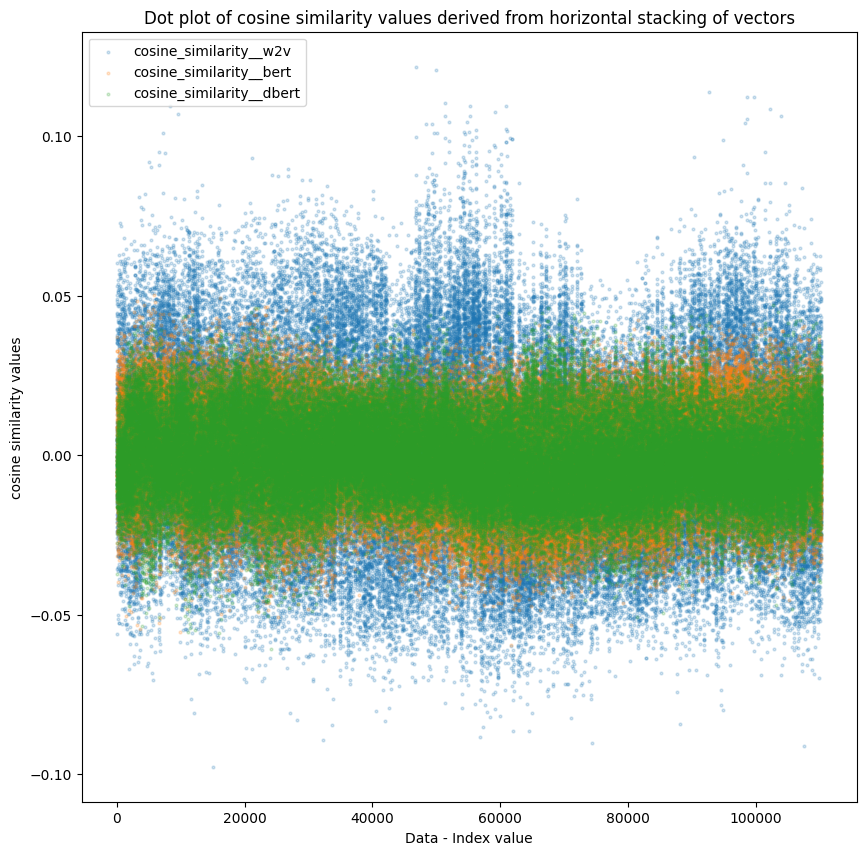

In [ ]:
# Plotting vertical cosine_similarities - Dot plot
pt.figure(figsize = (10,10))
for col_name in cosine_sim_data.columns:
    pt.scatter(range(len(cosine_sim_data)), cosine_sim_data[col_name], label = col_name, alpha = 0.2 ,s = 4)

pt.title("Dot plot of cosine similarity values derived from horizontal stacking of vectors")
pt.xlabel("Data - Index value")
pt.ylabel("cosine similarity values")
pt.legend()
pt.show()

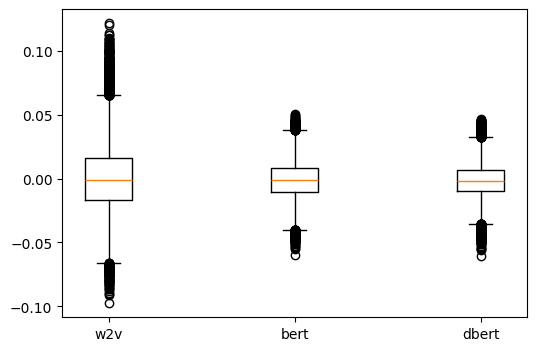

In [ ]:
# Plotting vertical cosine_similarities - box plot 

pt.figure(figsize= (6, 4))
pt.boxplot(cosine_sim_data, positions = [1, 3, 5], labels = ['w2v', 'bert', 'dbert'])
pt.show()

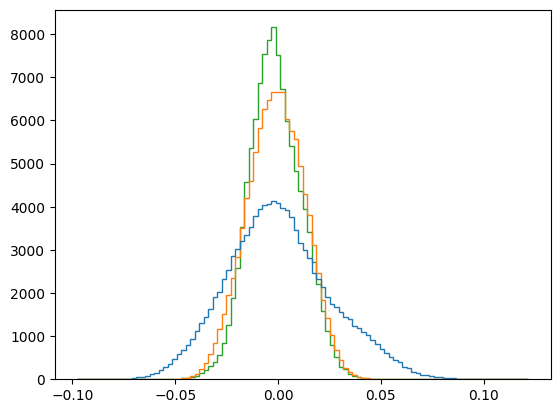

In [ ]:
# Plotting vertical cosine_similarities - histogram
pt.hist(cosine_sim_data, bins = 100, histtype = 'step')
pt.show()

In [ ]:
# Conducting t-test to check the closeness of the means

ttest_w2v_bert = ttest_ind(
    cosine_sim_data.cosine_similarity__w2v, 
    cosine_sim_data.cosine_similarity__bert,
    )

print(f't-test statistic w2v v/s bert = {ttest_w2v_bert}')

ttest_w2v_dbert = ttest_ind(
    cosine_sim_data.cosine_similarity__w2v, 
    cosine_sim_data.cosine_similarity__dbert
)
print(f't-test statistic w2v v/s dbert = {ttest_w2v_dbert}')

ttest_bert_dbert = ttest_ind(
    cosine_sim_data.cosine_similarity__bert,
    cosine_sim_data.cosine_similarity__dbert
)
print(f't-test statistic bert v/s dbert = {ttest_bert_dbert}')

t-test statistic w2v v/s bert = TtestResult(statistic=17.656967410918618, pvalue=1.0048190630678494e-69, df=220532.0)
t-test statistic w2v v/s dbert = TtestResult(statistic=20.288091568091076, pvalue=1.9865993193966893e-91, df=220532.0)
t-test statistic bert v/s dbert = TtestResult(statistic=3.3901286793214935, pvalue=0.0006987205968353406, df=220532.0)


A very low p-values in all of the cases suggest that there is no coherence with amongst the vectors generated. this is possibly due to the horizontally stacking of the vectors and using PCA to reduce the dimensionality. 